In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
data_all = pd.read_csv('crawl_data/FAKE_ALL.csv')

In [24]:
corpus = []
for item in data_all['weibo_content']:
    if type(item) == float:
        corpus.append('空')
    else:
        corpus.append(item)

In [28]:
part = corpus[6000:6428]

In [29]:
vec = CountVectorizer()
X = vec.fit_transform(part)
word = vec.get_feature_names()

In [32]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

In [47]:
cc = corpus[0]
for i in range(1, 100):
    cc = cc + corpus[i]

In [80]:
data_all['post_time'][i][0:7]

'2019-01'

In [108]:
sns.set_style('darkgrid')
Time = []
Time_n=[]
Time_e=[]
Time_s=[]
for i in range(0, len(data_all['post_time'])):
    Time.append(datetime.strptime(data_all['post_time'][i][0:10], '%Y-%m-%d'))
    if data_all['post_time'][i][3] == '9':
        Time_n.append(datetime.strptime(data_all['post_time'][i], '%Y-%m-%d %H:%M:%S'))
    elif data_all['post_time'][i][3] == '8':
        Time_e.append(datetime.strptime(data_all['post_time'][i], '%Y-%m-%d %H:%M:%S'))
    elif data_all['post_time'][i][3] == '7':
        Time_s.append(datetime.strptime(data_all['post_time'][i], '%Y-%m-%d %H:%M:%S'))


In [87]:
item

datetime.datetime(2018, 1, 1, 0, 0)

In [90]:
freq

[datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 9, 1, 0, 0),
 datetime.datetime(2019, 9, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 5, 1, 0, 0),
 datetime.datetime(2019, 6, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.da

/Users/wangyian/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/wangyian/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


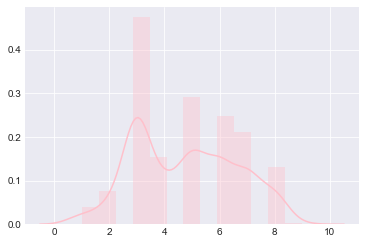

/Users/wangyian/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


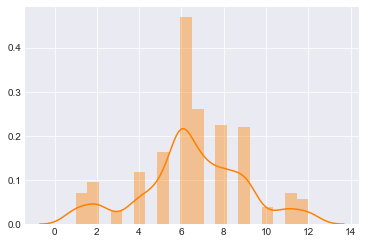

/Users/wangyian/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


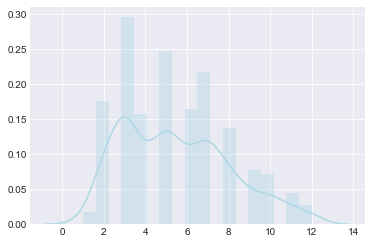

In [99]:
nine=[]
eight=[]
seven=[]
for i in range(0,len(Time_n)):
    nine.append(Time_n[i].month)

sns.distplot(nine, color='pink')
plt.show()

for i in range(0,len(Time_e)):
    eight.append(Time_e[i].month)

sns.distplot(eight, color='#ff8000')
plt.show()

for i in range(0,len(Time_s)):
    seven.append(Time_s[i].month)

sns.distplot(seven, color='lightblue')
plt.show()

In [49]:
def get_tokens(text):
    lowers = text.lower()
    #remove punctuation 
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
    no_punctuation = lowers.translate(remove_punctuation_map)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens
tokens = get_tokens(cc)
count = Counter(tokens)
print (count.most_common(10))

In [100]:
t1 = datetime.strptime('2019-03-01', '%Y-%m-%d')
t2 = datetime.strptime('2019-05-01', '%Y-%m-%d')


In [113]:
news = []
for i in range(len(data_all)):
    if (Time[i] > t1) & (Time[i] < t2):
        news.append(data_all['weibo_content'][i])

In [120]:
corpus = news[0]
for i in range(1, len(news)):
    corpus = corpus + news[i]

In [127]:
cc = []
cc.append(corpus)
len(cc)

1

In [129]:
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(cc)
vectorizer.get_feature_names()
vectorizer.fit_transform(cc).toarray()

['000万头',
 '07',
 '120全在',
 '12号晚上12点临睡前发现业主群有关于七中实验食堂食品问题',
 '12月2日',
 '157人全部罹难最后关头',
 '157人全部遇难',
 '157人又遇难',
 '16',
 '17日',
 '17日上午',
 '1980年后传到法国',
 '1亿头',
 '20',
 '2018届毕业的金先生的微博视频',
 '2018年',
 '2018年8月21日',
 '2018年8月3日',
 '2019年3',
 '2019年3月份400个监测县的生猪存栏环比下降1',
 '220v',
 '22日下午17时',
 '30',
 '302失踪了',
 '302航班',
 '3月10日',
 '3月21日下午14时',
 '3月7日',
 '3月全国猪肉批发均价每公斤19元',
 '40a的大电表',
 '44',
 '46岁',
 '4a',
 '4名伤者不幸离世',
 '4月17日上午',
 '4月19日',
 '4月21日晚',
 '58',
 '5q1q9ik',
 '5小时',
 '753亿头',
 '80元',
 '8max飞机',
 '8个多月传遍整个中国根据中国中央灾害应变中心统计',
 '8名中国公民遇难',
 '8日',
 '8被公路上的汽车前视监控录像全程记录了下来现发给大家看看',
 '94人重伤',
 '9月6日芜湖再爆非洲猪瘟',
 '_enoyout',
 'b737max8',
 'ba',
 'baggio童的微博视频',
 'cctv中央七套',
 'chenmo69的秒拍视频',
 'chi到了千年的秒拍视频',
 'cindygong1231的秒拍视频',
 'cn',
 'dylen_熙的秒拍视频',
 'eamryz2',
 'egvmjmu',
 'ejbqwtq',
 'ejrxbtw',
 'ejyznme',
 'em1qvqj',
 'emjnw3y',
 'et',
 'exf4dzi',
 'exiisv7',
 'exis39v',
 'exj2q4n',
 'exj7ae9',
 'exjlp1c',
 'exjm4qr',
 'exjmild',
 'exjv4uk',
 'exjwloj',
 'exjzfc5',
 'exl1mr6',
 